In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Analise de Dados

Neste momento iremos importar os dados e fazer uma analise exploratoria desses, os atributos se referem a:

Os atributos relacionados aos hábitos alimentares são: Consumo frequente de alimentos com alto teor calórico (CAVC), Frequência de consumo de hortaliças (FCVC), Número de refeições principais (NCP), Consumo de alimentos entre as refeições (CAEC), Consumo de água diariamente (CH20 ) e Consumo de álcool (CALC). Os atributos relacionados à condição física são: Monitoramento do consumo de calorias (CCS), Frequência de atividade física (FAF), Tempo de uso de dispositivos tecnológicos (TUE), Transporte utilizado (MTRANS)

## Exploração

In [5]:
df = pd.read_csv('../../playground-series-s4e2/test.csv')
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


Verificaremos agora, o número de nulos, que como observado não possui. caso tivessemos observado algum nulo precisariamos analisar o que deveremos fazer com esse dado. Além disso, observaremos as estatistica correspondentes de cada coluna

In [6]:
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

### Valores Númericos

In [7]:
number = df.select_dtypes(include=np.number)
number.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,27677.500000,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,3995.408198,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,20758.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24217.750000,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,27677.500000,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,31137.250000,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,34597.000000,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


Observamos que temos 13840 registros.

Além disso, achamos interessante que 75% das pessoas na base de dados possuem até 26 anos, Da mesma forma que 75% possuem mais de 1.60 de altura.

Enquanto ao consumo de hortaliças(FCVC) não parece haver uma disparidade mutio grande dentro da distribuições. 

Já ao número de refeições principais(NCP), observamos que dentro de cada quartil a divisão está dentro das 3 refeições, todavia dentro do primeiro quartil há pessoas que só alimentam uma vez no dia, e do ultimo quartil pessoas quem tem 4 refeições principais, acreditamos que pode estar relacionado a desnutrição e a obsidade como primeira impressão.

Já enquanto ao consumo de água(CH2O), observamos que 25% das pessoas não chegam a beber 2 litros de água, o que costuma ser recomendado acima dos 14 anos. A quantidade maxíma de água ingerida diáriamente é de 3 litros, todavia o peso máximo é de 165 quilos, que deveria beber em torno de 5 litros de água.

A frequência de atividades fisicas(FAF) observamos que 25% da base praticamente não pratica atividade fisica alguma, e metade de toda a base só pratica provavelmente 1 vez na semana, o que é um valor muito baixo.

O tempo usandoa dispositivos eletronicos ( TUE), 25% da base de dados não tem esse tempo registrado de forma relevante. Os maiores valores se localizam acima de 75% da distribuição 




#### Boxplot

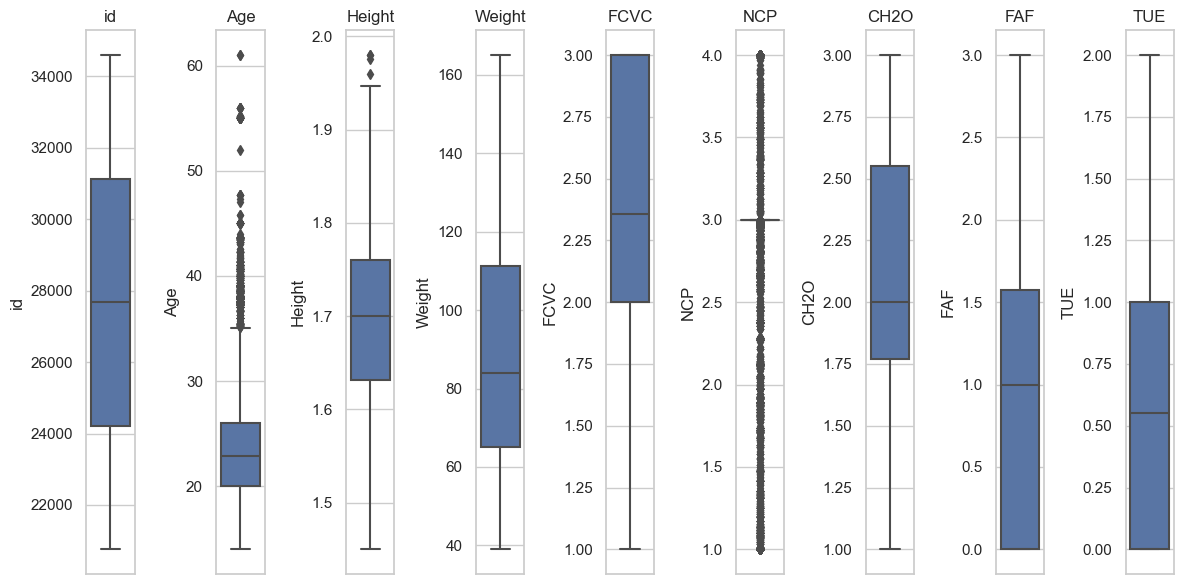

In [11]:
sns.set_theme(style="whitegrid")

# Criar uma única figura com múltiplos subplots
plt.figure(figsize=(12, 6))

# Loop sobre as colunas numéricas do DataFrame e plotar os boxplots
for i, coluna in enumerate(number.columns):
    plt.subplot(1, len(number.columns), i+1)
    sns.boxplot(y=df[coluna])
    plt.title(coluna)

# Ajustar o layout para evitar sobreposição de rótulos
plt.tight_layout()

# Exibir a figura
plt.show()

In [ ]:
sns.set(style="whitegrid")

# Criar uma única figura com múltiplos subplots
plt.figure(figsize=(12, 8))

# Loop sobre as colunas numéricas do DataFrame e plotar boxplots e violinos sobrepostos
for i, coluna in enumerate(number.columns):
    plt.subplot(1, len(number.columns), i+1)
    
    # Boxplot
    sns.boxplot(y=number[coluna], color='lightgray')
    
    # Violino sobreposto
    sns.violinplot(y=number[coluna], inner='quartile', color='skyblue', alpha=0.6)
    
    plt.title(coluna)

# Ajustar o layout para evitar sobreposição de rótulos
plt.tight_layout()

# Exibir a figura
plt.show()

### Valores Categoricos

In [8]:
letters = df.select_dtypes(include=np.object_)
letters.describe()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
count,13840,13840,13840,13840,13840,13840,13840,13840
unique,2,2,2,4,2,2,4,5
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
freq,6965,11384,12583,11689,13660,13376,9979,11111
